Importing Libraries

In [2]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2 
import os

Data Preprocessing

In [3]:

import os

parent_folder = 'face_age'

image_arrays = []

for age_folder in os.listdir(parent_folder):
    age_folder_path = os.path.join(parent_folder, age_folder)
    
    if os.path.isdir(age_folder_path):
        for filename in os.listdir(age_folder_path):
            if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                image_path = os.path.join(age_folder_path, filename)

                img = cv2.imread(image_path)

                if img is not None:


                    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                    if int(age_folder)<=5:
                        image_arrays.append((img_gray,1)) 

                    elif int(age_folder)<=12:
                        image_arrays.append((img_gray,2))
                    
                    elif int(age_folder)<=18:
                        image_arrays.append((img_gray,3))
                        
                    elif int(age_folder)<=30:
                        image_arrays.append((img_gray,4))
                        
                    elif int(age_folder)<=45:
                        image_arrays.append((img_gray,5))
                        
                    elif int(age_folder)<=65:
                        image_arrays.append((img_gray,6))

                    elif int(age_folder)<=80:
                        image_arrays.append((img_gray,7))

                    else:
                        image_arrays.append((img_gray,8))


In [6]:
image_arrays[1]

(array([[239, 237, 235, ..., 178, 177, 177],
        [240, 237, 235, ..., 178, 177, 177],
        [240, 238, 235, ..., 177, 176, 176],
        ...,
        [237, 236, 236, ..., 155, 158, 160],
        [237, 236, 236, ..., 158, 159, 162],
        [237, 236, 236, ..., 160, 161, 163]], dtype=uint8),
 1)

In [7]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(image_arrays, test_size=0.3, random_state=43)

val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)


Separating Dependent and Independent variable 

In [8]:
x_train = [item[0] for item in train_data]
y_train = [item[1] for item in train_data]

x_test = [item[0] for item in test_data]
y_test = [item[1] for item in test_data]

x_val = [item[0] for item in val_data]
y_val = [item[1] for item in val_data]

In [9]:
x_train[0]

array([[ 76,  74,  68, ...,  77,  82,  85],
       [ 77,  73,  68, ...,  76,  80,  83],
       [ 77,  73,  68, ...,  75,  77,  79],
       ...,
       [ 55,  53,  50, ...,  48,  72, 100],
       [ 54,  56,  55, ...,  46,  68,  95],
       [ 55,  58,  60, ...,  41,  62,  89]], dtype=uint8)

In [10]:
y_train[0]

5

In [11]:
x_test[0]

array([[ 2,  1,  1, ..., 30, 32, 33],
       [ 2,  1,  1, ..., 29, 31, 32],
       [ 1,  1,  1, ..., 28, 29, 30],
       ...,
       [23, 21, 19, ...,  8, 13, 16],
       [23, 21, 19, ...,  8, 13, 16],
       [22, 21, 19, ...,  8, 13, 15]], dtype=uint8)

In [12]:
len(x_train)

6828

In [10]:
len(x_test)

1464

In [11]:
len(x_val)

1463

In [12]:
x_train[0].shape

(200, 200)

Resizing images pixel

In [13]:
new_size = (100, 100)
resized_x_train = []

for image in x_train:
    resized_image = cv2.resize(image, new_size)
    resized_x_train.append(resized_image)


resized_x_train = np.array(resized_x_train)

print(resized_x_train.shape)

resized_x_test = []


for image in x_test:
    resized_image = cv2.resize(image, new_size)
    resized_x_test.append(resized_image)


resized_x_test = np.array(resized_x_test)

resized_x_val = []

for image in x_val:
    resized_image = cv2.resize(image, new_size)
    resized_x_val.append(resized_image)

resized_x_val = np.array(resized_x_val)    

(6828, 100, 100)


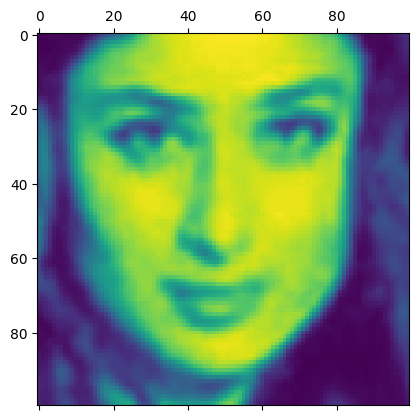

In [14]:
plt.matshow(resized_x_test[0])

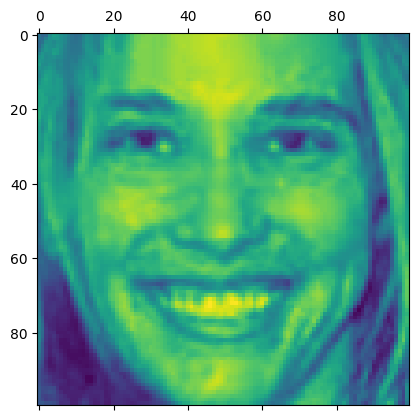

In [15]:
plt.matshow(resized_x_train[0])

In [16]:
y_train[0]

5

Normalizing x_dataset

In [17]:

x_train_normalized = resized_x_train / 255.0
x_test_normalized = resized_x_test / 255.0
x_val_normalized = resized_x_val / 255.0


In [19]:
x_test_normalized[0]

array([[0.00784314, 0.00392157, 0.00784314, ..., 0.08627451, 0.11372549,
        0.1254902 ],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.0745098 , 0.10196078,
        0.11372549],
       [0.        , 0.        , 0.00392157, ..., 0.07058824, 0.09411765,
        0.10980392],
       ...,
       [0.09019608, 0.07843137, 0.07843137, ..., 0.02745098, 0.03529412,
        0.06666667],
       [0.08627451, 0.0745098 , 0.0745098 , ..., 0.02352941, 0.03137255,
        0.05882353],
       [0.08627451, 0.0745098 , 0.0745098 , ..., 0.02352941, 0.03137255,
        0.05490196]])

In [20]:
x_test_normalized.shape

(1464, 100, 100)

In [21]:
x_train_normalized.shape

(6828, 100, 100)

Flattering X_dataset

In [22]:
X_train_flattened = x_train_normalized.reshape(len(x_train_normalized), 100*100)
X_test_flattened = x_test_normalized.reshape(len(x_test_normalized), 100*100)
X_val_flattened = x_val_normalized.reshape(len(x_val_normalized), 100*100)

In [23]:
X_train_flattened.shape

(6828, 10000)

In [24]:
X_train_flattened[0]

array([0.29411765, 0.25882353, 0.2745098 , ..., 0.20392157, 0.16862745,
       0.30980392])

In [25]:
X_train_flattened[0]

array([0.29411765, 0.25882353, 0.2745098 , ..., 0.20392157, 0.16862745,
       0.30980392])

In [26]:
X_train_flattened = np.array(X_train_flattened)


Convert  labels to one-hot encoded format

In [27]:
x_train_np = np.array(x_train)
x_test_np = np.array(x_test)
x_val_np = np.array(x_val)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)
y_val_np = np.array(y_val)

In [28]:
num_classes = 9

from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_np, num_classes=num_classes)
y_test_one_hot = to_categorical(y_test_np, num_classes=num_classes)
y_val_one_hot = to_categorical(y_val_np, num_classes=num_classes)



Reshaping x_dataset

In [29]:
x_train_reshaped = X_train_flattened.reshape(-1, 100, 100, 1)
x_val_reshaped = X_val_flattened.reshape(-1, 100, 100, 1)
x_test_reshaped = X_test_flattened.reshape(-1, 100, 100, 1)

CNN Architecture

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), input_shape=(100, 100, 1), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(512, kernel_size=(3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, kernel_size=(3, 3), activation='relu'), 
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(9, activation='softmax')
])
optimizer = Adam(learning_rate=0.001)  
model.compile(optimizer=optimizer, 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])  





Model training 

In [36]:

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=10,              
    restore_best_weights=True  
)

history = model.fit(
    x_train_reshaped,
    y_train_one_hot,
    epochs=100,batch_size=16,  
    validation_data=(x_val_reshaped, y_val_one_hot),
    callbacks=[early_stopping]  
)



Epoch 1/100
427/427 [==============================] - 15s 22ms/step - loss: 1.6978 - accuracy: 0.3556 - val_loss: 1.4974 - val_accuracy: 0.4518
Epoch 2/100
427/427 [==============================] - 9s 20ms/step - loss: 1.2742 - accuracy: 0.4993 - val_loss: 1.2719 - val_accuracy: 0.4928
Epoch 3/100
427/427 [==============================] - 8s 20ms/step - loss: 1.0994 - accuracy: 0.5617 - val_loss: 1.0744 - val_accuracy: 0.5783
Epoch 4/100
427/427 [==============================] - 9s 20ms/step - loss: 0.9762 - accuracy: 0.6095 - val_loss: 1.0349 - val_accuracy: 0.5817
Epoch 5/100
427/427 [==============================] - 9s 20ms/step - loss: 0.9013 - accuracy: 0.6328 - val_loss: 0.9700 - val_accuracy: 0.5967
Epoch 6/100
427/427 [==============================] - 9s 20ms/step - loss: 0.8201 - accuracy: 0.6588 - val_loss: 0.9255 - val_accuracy: 0.6179
Epoch 7/100
427/427 [==============================] - 9s 20ms/step - loss: 0.7478 - accuracy: 0.6882 - val_loss: 0.9542 - val_accuracy

Plotting Loss and Accuracy curves

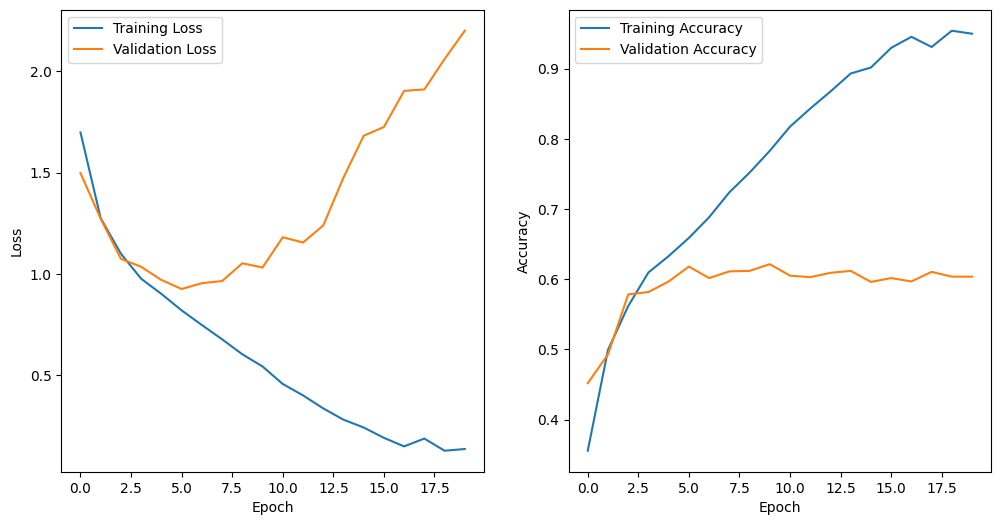

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [39]:
label_dtype = X_train_flattened.dtype
print("Label Data Type:", label_dtype)

Label Data Type: float64


Evaluation on test data

In [77]:
x_test_reshaped = x_test_reshaped.reshape(-1, 100, 100, 1)
y_predict = model.predict(x_test_reshaped,batch_size=16)
model.evaluate(x_test_reshaped, y_test_one_hot, batch_size=16)

92/92 [==============================] - 1s 7ms/step - loss: 1.1312 - accuracy: 0.6127


[1.1311742067337036, 0.6127049326896667]

Plotting confusion Matrix

Text(158.22222222222223, 0.5, 'true')

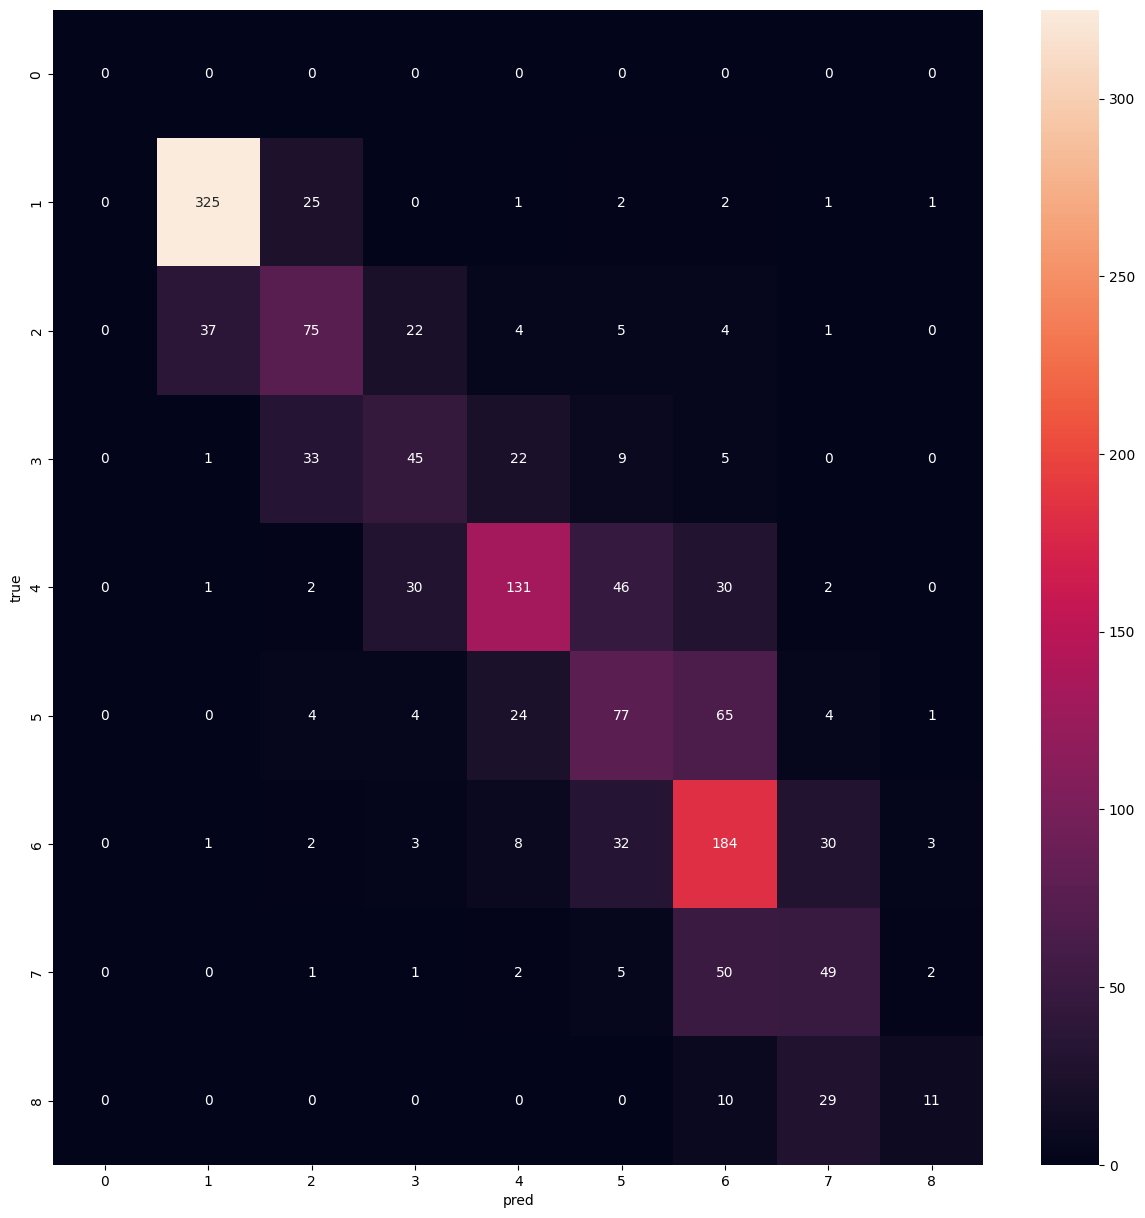

In [78]:
y_predict_labels=[np.argmax(i) for i in y_predict]
cn=tf.math.confusion_matrix(labels=y_test_np,predictions=y_predict_labels)
import seaborn as sn
plt.figure(figsize=(15,15))
sn.heatmap(cn, annot=True, fmt='d')
plt.xlabel('pred')
plt.ylabel('true')

Saving the model

In [45]:
def predict_with_model(model, input_data):
    return model(input_data)
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets


Loading Model

In [1]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("saved_model")

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU, compute capability 8.6


In [30]:
loaded_model.evaluate(x_test_reshaped, y_test_one_hot, batch_size=16)

92/92 [==============================] - 4s 7ms/step - loss: 1.1312 - accuracy: 0.6127


[1.1311742067337036, 0.6127049326896667]

Real life Testing


In [15]:
import cv2
import numpy as np

image = cv2.imread('Sample image for Real time testing.jpg') 

img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

resized_image = cv2.resize(img_gray, (100,100))
image_np = np.array(resized_image)

resized_image = np.reshape(image_np, (-1, 100, 100, 1))

img_normalized = resized_image/ 255.0

prediction=loaded_model.predict(img_normalized)
max_position = np.argmax(prediction)

print("YOUR AGE IS: ")

if(max_position==1):
    print("0-5")
elif(max_position==2):
    print("6-12")
elif(max_position==3):
    print("13-18")
elif(max_position==4):
    print("19-30")
elif(max_position==5):
    print("31-45")
elif(max_position==6):
    print("46-65")
elif(max_position==7):
    print("66-80")
else:
    print(">81")

1/1 [==============================] - 0s 43ms/step
YOUR AGE IS: 
6-12
